In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/78829938/coefficients-for-inverse-polynomial-fit-in-python

/tmp/ipykernel_14223/559940640.py:15: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for item in cs.collections: # I understand this will be deprecated soon


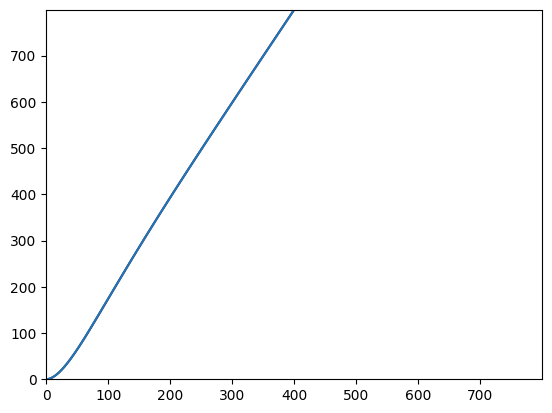

In [2]:
delta = 0.5
xrange = np.arange(0.0, 800.0, delta)
yrange = np.arange(0.0, 800.0, delta)
X, Y = np.meshgrid(xrange, yrange)

a = 0.04
d = 0.02
F = X # LHS
G = Y*d / (a*(1-(1-d)**(X+1))) # RHS

x_arr = np.zeros(0)
y_arr = np.zeros(0)
cs = plt.contour(X, Y, (F-G), [0])

for item in cs.collections: # I understand this will be deprecated soon
    for i in item.get_paths():
        v = i.vertices
        x = v[:, 0]
        y = v[:, 1]
        x_arr = np.append(x_arr, x)
        y_arr = np.append(y_arr, y)

c_plot = plt.plot(x_arr, y_arr, label="c_plot")

In [6]:
def poly(y, a, b, c, d, e, f, g, h, i):
    return a + b*y + c*y**2 + d*y**3 + e*y**4 + f*y**5 + g*y**6 + h*y**7 + i*y**8

In [21]:
def model(x, a, d):
    return a / d * x * (1. - np.power(1. - d, x + 1))

In [22]:
popt, pcov = optimize.curve_fit(model, x_arr, y_arr, p0=[1e-2, 1e-2])
popt, pcov

(array([0.03999981, 0.0199999 ]),
 array([[5.41836578e-17, 2.78857305e-17],
        [2.78857305e-17, 1.44052478e-17]]))

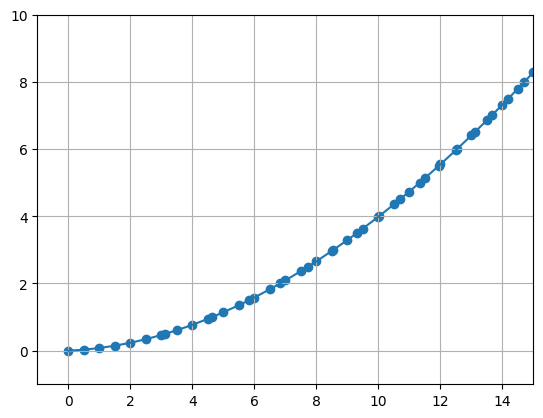

In [23]:
fig, axe = plt.subplots()
axe.scatter(x_arr, y_arr)
axe.plot(x_arr, model(x_arr, *popt))
axe.set_xlim([-1, 15])
axe.set_ylim([-1, 10])
axe.grid()